In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GroupKFold
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
# Import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Import Support vector machine
from sklearn.svm import SVC
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', None)

### Tester forskellige modeller

In [125]:
# Decision tree
# Random Forest
# SVM (Support Vector Machine)
# KNN (K-Nearest Neighbors)
# Logistic Regression

### LogisticRegression

In [126]:
############## Forward selection of features in a decision tree model and see which features are the most important

# Load dataset into a pandas DataFrame
data = pd.read_csv('C:/Users/mathi/OneDrive/Skrivebord/2_Sem_Kand/Projekt_Kandidat2/Projekt_Kandidat2/DataPreb/DataPSGandDetektion.csv')

# ## Split the data into input (X) and output (y)
# X = data[['AVGHR', 'AVGRR', 'AVGACT', 'SLEEPSCORE', 'DURATIONINBED', 'DURATIONAWAKE', 'DURATIONINSLEEP', 'DURATIONINREM', 'DURATIONINLIGHT', 'DURATIONINDEEP', 'DURATIONSLEEPONSET', 'BEDEXITDURATION', 'BEDEXITCOUNT', 'TOSSNTURNCOUNT', 'FROMGMTOFFSET', 'MINHR', 'MAXHR', 'MINRR', 'MAXRR', 'FMCOUNT', 'AWAKENINGS', 'HRVSCORE', 'HRVLF', 'HRVHF', 'HRVRMSSDEVENING', 'HRVRMSSDMORNING', 'BPSYS', 'BPDIA', 'HR', 'WEIGHT', 'STEPS', 'NYHABL', 'AGEBL', 'WEIGHTBL', 'HEIGHTBL', 'BPSYSBL', 'BPDIABL', 'HRB', 'EFTITBL', 'GENDER']]
# y = data['SLEEPAPNEA']

# patient_ids = data['patient_ID']

# # Find unikke patient-ID'er
# unique_patients = np.unique(patient_ids)

# # Opdel patient-ID'er i træning og test
# train_patients, test_patients = train_test_split(unique_patients, test_size=0.2, random_state=42)

# # Opdel data efter patient-ID
# X_train = X[patient_ids.isin(train_patients)]
# y_train = y[patient_ids.isin(train_patients)]
# X_test = X[patient_ids.isin(test_patients)]
# y_test = y[patient_ids.isin(test_patients)]

# # Lav Sequential Feature Selector med LogisticRegression
# sfs = SequentialFeatureSelector(LogisticRegression(max_iter=1000), k_features=(1, len(X.columns)//2), forward=True, floating=False, verbose=0, scoring='roc_auc', cv=5)

# sfs.fit(X_train, y_train)

# sfs.subsets_

# {1: {'feature_idx': (34,),
#   'cv_scores': array([1.        , 1.        , 1.        , 0.90523457, 0.37096296]),
#   'avg_score': 0.8552395061728395,
#   'feature_names': ('HEIGHTBL',)},
#  2: {'feature_idx': (34, 35),
#   'cv_scores': array([1.        , 1.        , 1.        , 1.        , 0.52716049]),
#   'avg_score': 0.9054320987654322,
#   'feature_names': ('HEIGHTBL', 'BPSYSBL')},
#  3: {'feature_idx': (18, 34, 35),
#   'cv_scores': array([1.        , 1.        , 1.        , 1.        , 0.52716049]),
#   'avg_score': 0.9054320987654322,
#   'feature_names': ('MAXRR', 'HEIGHTBL', 'BPSYSBL')},
#  4: {'feature_idx': (18, 31, 34, 35),
#   'cv_scores': array([1.        , 1.        , 1.        , 1.        , 0.52716049]),
#   'avg_score': 0.9054320987654322,
#   'feature_names': ('MAXRR', 'NYHABL', 'HEIGHTBL', 'BPSYSBL')},
#  5: {'feature_idx': (18, 19, 31, 34, 35),
#   'cv_scores': array([1.        , 1.        , 1.        , 1.        , 0.52716049]),
#   'avg_score': 0.9054320987654322,
#   'feature_names': ('MAXRR', 'FMCOUNT', 'NYHABL', 'HEIGHTBL', 'BPSYSBL')},
#  6: {'feature_idx': (18, 19, 20, 31, 34, 35),
#   'cv_scores': array([1.        , 1.        , 1.        , 1.        , 0.52716049]),
#   'avg_score': 0.9054320987654322,
#   'feature_names': ('MAXRR',
#    'FMCOUNT',
#    'AWAKENINGS',
#    'NYHABL',
#    'HEIGHTBL',
#    'BPSYSBL')},
#  7: {'feature_idx': (18, 19, 20, 31, 34, 35, 39),
#   'cv_scores': array([1.        , 1.        , 1.        , 1.        , 0.52716049]),
#   'avg_score': 0.9054320987654322,
#   'feature_names': ('MAXRR',
#    'FMCOUNT',
#    'AWAKENINGS',
#    'NYHABL',
#    'HEIGHTBL',
#    'BPSYSBL',
#    'GENDER')},
#  8: {'feature_idx': (12, 18, 19, 20, 31, 34, 35, 39),
#   'cv_scores': array([1.        , 1.        , 1.        , 0.9982963 , 0.52716049]),
#   'avg_score': 0.9050913580246913,
#   'feature_names': ('BEDEXITCOUNT',
#    'MAXRR',
#    'FMCOUNT',
#    'AWAKENINGS',
#    'NYHABL',
#    'HEIGHTBL',
#    'BPSYSBL',
#    'GENDER')},
#  9: {'feature_idx': (12, 18, 19, 20, 29, 31, 34, 35, 39),
#   'cv_scores': array([1.        , 0.99625316, 1.        , 1.        , 0.52074074]),
#   'avg_score': 0.9033987798114254,
#   'feature_names': ('BEDEXITCOUNT',
#    'MAXRR',
#    'FMCOUNT',
#    'AWAKENINGS',
#    'WEIGHT',
#    'NYHABL',
#    'HEIGHTBL',
#    'BPSYSBL',
#    'GENDER')},
#  10: {'feature_idx': (12, 14, 18, 19, 20, 29, 31, 34, 35, 39),
#   'cv_scores': array([1.        , 0.99943304, 0.99417021, 1.        , 0.52601235]),
#   'avg_score': 0.9039231199030423,
#   'feature_names': ('BEDEXITCOUNT',
#    'FROMGMTOFFSET',
#    'MAXRR',
#    'FMCOUNT',
#    'AWAKENINGS',
#    'WEIGHT',
#    'NYHABL',
#    'HEIGHTBL',
#    'BPSYSBL',
#    'GENDER')},



# # ################### Lav Logistisk Regression og lav CV = 5 og test på test sættet (de 20%) #####################
# X = data[['MAXRR', 'FMCOUNT', 'NYHABL', 'HEIGHTBL', 'BPSYSBL', 'AWAKENINGS', 'GENDER', 'BEDEXITCOUNT']]
# y = data['SLEEPAPNEA']
# patient_ids = data['patient_ID']

# # Find unikke patient-ID'er
# unique_patients = np.unique(patient_ids)

# # Opdel patient-ID'er i træning og test
# train_patients, test_patients = train_test_split(unique_patients, test_size=0.2, random_state=101)

# # Opdel data efter patient-ID
# X_train = X[patient_ids.isin(train_patients)]
# y_train = y[patient_ids.isin(train_patients)]
# X_test = X[patient_ids.isin(test_patients)]
# y_test = y[patient_ids.isin(test_patients)]

# # Opret en logistisk regressionsmodel
# logreg = LogisticRegression()

# # Tilpas modellen til træningssættet
# logreg.fit(X_train, y_train)

# # Beregn ROC AUC score på test sættet
# y_pred_prob = logreg.predict_proba(X_test)[:, 1]
# print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, y_pred_prob)))


# Logistic Regression med 3 features = ROC AUC score: 0.813
# 3 features = ROC AUC score: 0.813
# 4 features = ROC AUC score: 0.730
# 5 features = ROC AUC score: 0.730
# 6 features = ROC AUC score: 0.701
# 7 features = ROC AUC score: 0.791
# 8 features = ROC AUC score: 0.719




### Decision Tree

In [127]:
# # ## Split the data into input (X) and output (y)
# X = data[['AVGHR', 'AVGRR', 'AVGACT', 'SLEEPSCORE', 'DURATIONINBED', 'DURATIONAWAKE', 'DURATIONINSLEEP', 'DURATIONINREM', 'DURATIONINLIGHT', 'DURATIONINDEEP', 'DURATIONSLEEPONSET', 'BEDEXITDURATION', 'BEDEXITCOUNT', 'TOSSNTURNCOUNT', 'FROMGMTOFFSET', 'MINHR', 'MAXHR', 'MINRR', 'MAXRR', 'FMCOUNT', 'AWAKENINGS', 'HRVSCORE', 'HRVLF', 'HRVHF', 'HRVRMSSDEVENING', 'HRVRMSSDMORNING', 'BPSYS', 'BPDIA', 'HR', 'WEIGHT', 'STEPS', 'NYHABL', 'AGEBL', 'WEIGHTBL', 'HEIGHTBL', 'BPSYSBL', 'BPDIABL', 'HRB', 'EFTITBL', 'GENDER']]
# y = data['SLEEPAPNEA']

# patient_ids = data['patient_ID']

# # Find unikke patient-ID'er
# unique_patients = np.unique(patient_ids)

# # Opdel patient-ID'er i træning og test
# train_patients, test_patients = train_test_split(unique_patients, test_size=0.2, random_state=42)

# # Opdel data efter patient-ID
# X_train = X[patient_ids.isin(train_patients)]
# y_train = y[patient_ids.isin(train_patients)]
# X_test = X[patient_ids.isin(test_patients)]
# y_test = y[patient_ids.isin(test_patients)]

# # Lav Sequential Feature Selector med DecisionTreeClassifier
# sfs = SequentialFeatureSelector(DecisionTreeClassifier(), k_features=(1, len(X.columns)//2), forward=True, floating=False, verbose=0, scoring='roc_auc', cv=5)

# sfs.fit(X_train, y_train)

# sfs.subsets_

# {1: {'feature_idx': (35,),
#   'cv_scores': array([0.9225    , 0.83943428, 1.        , 1.        , 0.78185185]),
#   'avg_score': 0.908757225611635,
#   'feature_names': ('BPSYSBL',)},
#  2: {'feature_idx': (1, 35),
#   'cv_scores': array([0.98365196, 0.97918901, 1.        , 0.97138889, 0.77593827]),
#   'avg_score': 0.9420336254511665,
#   'feature_names': ('AVGRR', 'BPSYSBL')},
#  3: {'feature_idx': (1, 35, 39),
#   'cv_scores': array([0.98365196, 0.98288655, 1.        , 0.97138889, 0.77593827]),
#   'avg_score': 0.9427731336781955,
#   'feature_names': ('AVGRR', 'BPSYSBL', 'GENDER')},
#  4: {'feature_idx': (1, 12, 35, 39),
#   'cv_scores': array([0.98257353, 0.98956677, 0.99546435, 0.97138889, 0.77162346]),
#   'avg_score': 0.9421233992123994,
#   'feature_names': ('AVGRR', 'BEDEXITCOUNT', 'BPSYSBL', 'GENDER')},
#  5: {'feature_idx': (1, 12, 20, 35, 39),
#   'cv_scores': array([0.98171569, 0.98214704, 1.        , 0.97138889, 0.77130247]),
#   'avg_score': 0.9413108166370018,
#   'feature_names': ('AVGRR',
#    'BEDEXITCOUNT',
#    'AWAKENINGS',
#    'BPSYSBL',
#    'GENDER')},
#  6: {'feature_idx': (1, 12, 18, 20, 35, 39),
#   'cv_scores': array([0.97933211, 0.97852961, 0.9962963 , 0.97138889, 0.77496296]),
#   'avg_score': 0.9401019734266418,
#   'feature_names': ('AVGRR',
#    'BEDEXITCOUNT',
#    'MAXRR',
#    'AWAKENINGS',
#    'BPSYSBL',
#    'GENDER')},
#  7: {'feature_idx': (1, 4, 12, 18, 20, 35, 39),
#   'cv_scores': array([0.97544118, 0.97520182, 1.        , 0.97509259, 0.77203704]),
#   'avg_score': 0.9395545260441022,
#   'feature_names': ('AVGRR',
#    'DURATIONINBED',
#    'BEDEXITCOUNT',
#    'MAXRR',
#    'AWAKENINGS',
#    'BPSYSBL',
#    'GENDER')},
#  8: {'feature_idx': (1, 4, 11, 12, 18, 20, 35, 39),
#   'cv_scores': array([0.97259804, 0.97769766, 0.9946324 , 0.97638889, 0.77527778]),
#   'avg_score': 0.9393189546108701,
#   'feature_names': ('AVGRR',
#    'DURATIONINBED',
#    'BEDEXITDURATION',
#    'BEDEXITCOUNT',
#    'MAXRR',
#    'AWAKENINGS',
#    'BPSYSBL',
#    'GENDER')},
#  9: {'feature_idx': (1, 4, 11, 12, 17, 18, 20, 35, 39),
#   'cv_scores': array([0.97460784, 0.98676897, 0.9946324 , 0.97555556, 0.77407407]),
#   'avg_score': 0.9411277681714209,
#   'feature_names': ('AVGRR',
#    'DURATIONINBED',
#    'BEDEXITDURATION',
#    'BEDEXITCOUNT',
#    'MINRR',
#    'MAXRR',
#    'AWAKENINGS',
#    'BPSYSBL',
#    'GENDER')},
#  10: {'feature_idx': (1, 4, 9, 11, 12, 17, 18, 20, 35, 39),
#   'cv_scores': array([0.96843137, 0.99130462, 0.9946324 , 0.97555556, 0.77527778]),
#   'avg_score': 0.9410403448863368,
#   'feature_names': ('AVGRR',
#    'DURATIONINBED',
#    'DURATIONINDEEP',
#    'BEDEXITDURATION',
#    'BEDEXITCOUNT',
#    'MINRR',
#    'MAXRR',
#    'AWAKENINGS',
#    'BPSYSBL',
#    'GENDER')},

# # # ################### Lav Decision Tree og lav CV = 5 og test på test sættet (de 20%) #####################
# X = data[['AVGRR', 'BEDEXITCOUNT', 'BPSYSBL', 'GENDER', 'AWAKENINGS', 'MAXRR', 'DURATIONINBED', 'BEDEXITDURATION', 'MINRR', 'DURATIONINDEEP']]
# y = data['SLEEPAPNEA']
# patient_ids = data['patient_ID']

# # Find unikke patient-ID'er
# unique_patients = np.unique(patient_ids)

# # Opdel patient-ID'er i træning og test
# train_patients, test_patients = train_test_split(unique_patients, test_size=0.2, random_state=101)

# # Opdel data efter patient-ID
# X_train = X[patient_ids.isin(train_patients)]
# y_train = y[patient_ids.isin(train_patients)]
# X_test = X[patient_ids.isin(test_patients)]
# y_test = y[patient_ids.isin(test_patients)]

# # Træn og evaluér modellen som tidligere
# dtree = DecisionTreeClassifier()
# dtree.fit(X_train, y_train)
# y_pred_prob = dtree.predict_proba(X_test)[:, 1]
# print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, y_pred_prob)))


# Decision Tree med 9 features giver en ROC AUC score på 0.579
## 2 features accuracy = 0.329
## 3 features accuracy = 0.329
## 4 features accuracy = 0.341
## 5 features accuracy = 0.341
## 6 features accuracy = 0.422
## 7 features accuracy = 0.438
## 8 features accuracy = 0.489
## 9 features accuracy = 0.579
## 10 features accuracy = 0.500


### Random Forest

In [128]:
## Split the data into input (X) and output (y)
# X = data[['AVGHR', 'AVGRR', 'AVGACT', 'SLEEPSCORE', 'DURATIONINBED', 'DURATIONAWAKE', 'DURATIONINSLEEP', 'DURATIONINREM', 'DURATIONINLIGHT', 'DURATIONINDEEP', 'DURATIONSLEEPONSET', 'BEDEXITDURATION', 'BEDEXITCOUNT', 'TOSSNTURNCOUNT', 'FROMGMTOFFSET', 'MINHR', 'MAXHR', 'MINRR', 'MAXRR', 'FMCOUNT', 'AWAKENINGS', 'HRVSCORE', 'HRVLF', 'HRVHF', 'HRVRMSSDEVENING', 'HRVRMSSDMORNING', 'BPSYS', 'BPDIA', 'HR', 'WEIGHT', 'STEPS', 'NYHABL', 'AGEBL', 'WEIGHTBL', 'HEIGHTBL', 'BPSYSBL', 'BPDIABL', 'HRB', 'EFTITBL', 'GENDER']]
# y = data['SLEEPAPNEA']

# patient_ids = data['patient_ID']

# # Find unikke patient-ID'er
# unique_patients = np.unique(patient_ids)

# # Opdel patient-ID'er i træning og test
# train_patients, test_patients = train_test_split(unique_patients, test_size=0.2, random_state=42)

# # Opdel data efter patient-ID
# X_train = X[patient_ids.isin(train_patients)]
# y_train = y[patient_ids.isin(train_patients)]
# X_test = X[patient_ids.isin(test_patients)]
# y_test = y[patient_ids.isin(test_patients)]

# # Lav Sequential Feature Selector med DecisionTreeClassifier
# sfs = SequentialFeatureSelector(RandomForestClassifier(), k_features=(1, len(X.columns)//2), forward=True, floating=False, verbose=0, scoring='roc_auc', cv=5)

# sfs.fit(X_train, y_train)

# sfs.subsets_

# {1: {'feature_idx': (35,),
#   'cv_scores': array([0.9225    , 0.83943428, 1.        , 1.        , 0.78185185]),
#   'avg_score': 0.908757225611635,
#   'feature_names': ('BPSYSBL',)},
#  2: {'feature_idx': (33, 35),
#   'cv_scores': array([0.9225    , 1.        , 1.        , 1.        , 0.94117901]),
#   'avg_score': 0.9727358024691357,
#   'feature_names': ('WEIGHTBL', 'BPSYSBL')},
#  3: {'feature_idx': (29, 33, 35),
#   'cv_scores': array([0.96702819, 1.        , 1.        , 1.        , 0.95625309]),
#   'avg_score': 0.9846562545388526,
#   'feature_names': ('WEIGHT', 'WEIGHTBL', 'BPSYSBL')},
#  4: {'feature_idx': (29, 31, 33, 35),
#   'cv_scores': array([0.99876225, 1.        , 1.        , 1.        , 0.91014815]),
#   'avg_score': 0.9817820806100219,
#   'feature_names': ('WEIGHT', 'NYHABL', 'WEIGHTBL', 'BPSYSBL')},
#  5: {'feature_idx': (29, 31, 33, 35, 36),
#   'cv_scores': array([1.        , 1.        , 1.        , 1.        , 0.91546914]),
#   'avg_score': 0.9830938271604939,
#   'feature_names': ('WEIGHT', 'NYHABL', 'WEIGHTBL', 'BPSYSBL', 'BPDIABL')},
#  6: {'feature_idx': (0, 29, 31, 33, 35, 36),
#   'cv_scores': array([1.        , 1.        , 1.        , 1.        , 0.93833951]),
#   'avg_score': 0.9876679012345679,
#   'feature_names': ('AVGHR',
#    'WEIGHT',
#    'NYHABL',
#    'WEIGHTBL',
#    'BPSYSBL',
#    'BPDIABL')},
#  7: {'feature_idx': (0, 29, 31, 33, 35, 36, 39),
#   'cv_scores': array([1.        , 1.        , 1.        , 1.        , 0.93125309]),
#   'avg_score': 0.9862506172839506,
#   'feature_names': ('AVGHR',
#    'WEIGHT',
#    'NYHABL',
#    'WEIGHTBL',
#    'BPSYSBL',
#    'BPDIABL',
#    'GENDER')},
#  8: {'feature_idx': (0, 1, 29, 31, 33, 35, 36, 39),
#   'cv_scores': array([1.        , 1.        , 1.        , 1.        , 0.94098765]),
#   'avg_score': 0.9881975308641975,
#   'feature_names': ('AVGHR',
#    'AVGRR',
#    'WEIGHT',
#    'NYHABL',
#    'WEIGHTBL',
#    'BPSYSBL',
#    'BPDIABL',
#    'GENDER')},
#  9: {'feature_idx': (0, 1, 17, 29, 31, 33, 35, 36, 39),
#   'cv_scores': array([1.        , 1.        , 1.        , 0.99998765, 0.95210494]),
#   'avg_score': 0.9904185185185185,
#   'feature_names': ('AVGHR',
#    'AVGRR',
#    'MINRR',
#    'WEIGHT',
#    'NYHABL',
#    'WEIGHTBL',
#    'BPSYSBL',
#    'BPDIABL',
#    'GENDER')},
#  10: {'feature_idx': (0, 1, 2, 17, 29, 31, 33, 35, 36, 39),
#   'cv_scores': array([1.        , 1.        , 1.        , 1.        , 0.95314815]),
#   'avg_score': 0.9906296296296297,
#   'feature_names': ('AVGHR',
#    'AVGRR',
#    'AVGACT',
#    'MINRR',
#    'WEIGHT',
#    'NYHABL',
#    'WEIGHTBL',
#    'BPSYSBL',
#    'BPDIABL',
#    'GENDER')},

# # # ################### Lav Decision Tree og lav CV = 5 og test på test sættet (de 20%) #####################
# X = data[['WEIGHTBL', 'BPSYSBL']]
# y = data['SLEEPAPNEA']
# patient_ids = data['patient_ID']

# # Find unikke patient-ID'er
# unique_patients = np.unique(patient_ids)

# # Opdel patient-ID'er i træning og test
# train_patients, test_patients = train_test_split(unique_patients, test_size=0.2, random_state=101)

# # Opdel data efter patient-ID
# X_train = X[patient_ids.isin(train_patients)]
# y_train = y[patient_ids.isin(train_patients)]
# X_test = X[patient_ids.isin(test_patients)]
# y_test = y[patient_ids.isin(test_patients)]

# # Træn og evaluér modellen som tidligere
# dtree = RandomForestClassifier()
# dtree.fit(X_train, y_train)
# y_pred_prob = dtree.predict_proba(X_test)[:, 1]
# print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, y_pred_prob)))




########################## GridSearchCV ##########################

# X = data[['WEIGHT', 'NYHABL', 'WEIGHTBL', 'BPSYSBL', 'BPDIABL', 'AVGHR']]
# y = data['SLEEPAPNEA']

# patient_ids = data['patient_ID']

# # Find unikke patient-ID'er
# unique_patients = np.unique(patient_ids)

# # Opdel patient-ID'er i træning og test
# train_patients, test_patients = train_test_split(unique_patients, test_size=0.2, random_state=42)

# # Opdel data efter patient-ID
# X_train = X[patient_ids.isin(train_patients)]
# y_train = y[patient_ids.isin(train_patients)]
# X_test = X[patient_ids.isin(test_patients)]
# y_test = y[patient_ids.isin(test_patients)]

# # Træn og evaluér modellen som tidligere
# rfc = RandomForestClassifier()
# rfc.fit(X_train, y_train)
# y_pred_prob = rfc.predict_proba(X_test)[:, 1]
# print("ROC AUC score: {:.3f}".format(roc_auc_score(y_test, y_pred_prob)))


# # #### Train a Random Forest and try to optimize it for the training data
# # param_grid = {'n_estimators': [10, 50, 100, 200, 500], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# grid = GridSearchCV(RandomForestClassifier(), cv=5)
# grid.fit(X_train, y_train)
# print('Best parameters: ', grid.best_params_)
# print('Best cross-validation score: ', grid.best_score_)
# print('Test set score: ', grid.score(X_test, y_test))
# 4 features = 0.9385

# DET ENDELIGE KODE STYKKE SOM PLOTTER ALLE MODELLERNE

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

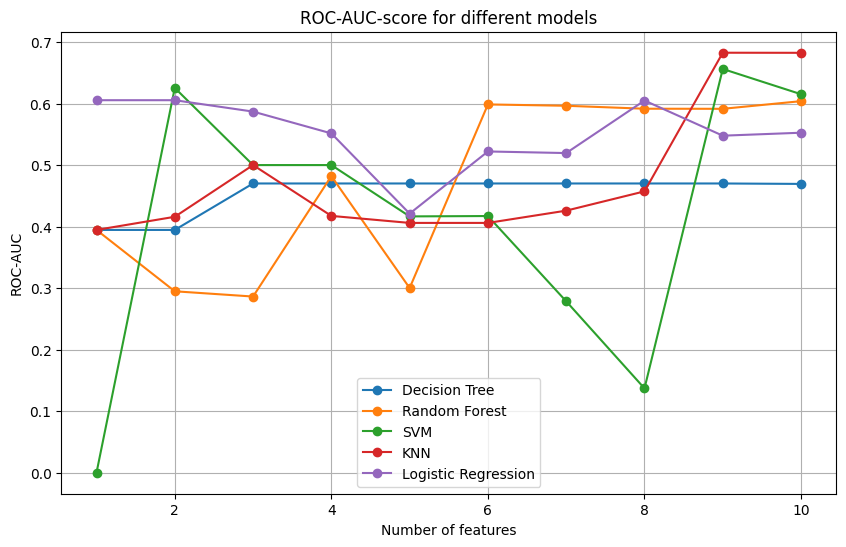

In [129]:
X = data[['AVGHR', 'AVGRR', 'AVGACT', 'SLEEPSCORE', 'DURATIONINBED', 'DURATIONAWAKE', 'DURATIONINSLEEP', 'DURATIONINREM', 'DURATIONINLIGHT', 'DURATIONINDEEP', 'DURATIONSLEEPONSET', 'BEDEXITDURATION', 'BEDEXITCOUNT', 'TOSSNTURNCOUNT', 'FROMGMTOFFSET', 'MINHR', 'MAXHR', 'MINRR', 'MAXRR', 'FMCOUNT', 'AWAKENINGS', 'HRVSCORE', 'HRVLF', 'HRVHF', 'HRVRMSSDEVENING', 'HRVRMSSDMORNING', 'BPSYS', 'BPDIA', 'HR', 'WEIGHT', 'STEPS', 'NYHABL', 'AGEBL', 'WEIGHTBL', 'HEIGHTBL', 'BPSYSBL', 'BPDIABL', 'HRB', 'EFTITBL', 'GENDER']]
y = data['SLEEPAPNEA']

patient_ids = data['patient_ID']

# Find unikke patient-ID'er
unique_patients = np.unique(patient_ids)

# Opdel patient-ID'er i træning og test
train_patients, test_patients = train_test_split(unique_patients, test_size=0.2, random_state=42)

# Opdel data efter patient-ID
X_train = X[patient_ids.isin(train_patients)]
y_train = y[patient_ids.isin(train_patients)]
X_test = X[patient_ids.isin(test_patients)]
y_test = y[patient_ids.isin(test_patients)]

models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(probability=True),
    KNeighborsClassifier(),
    LogisticRegression()
]

model_names = ['Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Logistic Regression']

auc_scores = []

# Træn modellerne og evaluer ROC-AUC-scoren for hver model med forskellige antal features
num_features = range(1, 11)

for model in models:
    scores = []
    for num in num_features:
        selector = SelectKBest(f_classif, k=num)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = selector.transform(X_test)

        pipeline = Pipeline([
            ('selector', selector), 
            ('model', model) 
        ])

        parameters = {}
        
        # Define the hyperparameters to be tuned for each model
        if isinstance(model, DecisionTreeClassifier): # Check if model is a Decision Tree
            parameters = {'model__max_depth': [None, 5, 10], # Define hyperparameters for the model
                          'model__min_samples_split': [2, 5, 10]} # Define hyperparameters for the model
        elif isinstance(model, RandomForestClassifier): 
            parameters = {'model__n_estimators': [100, 200, 300],
                          'model__max_depth': [None, 5, 10]}
        elif isinstance(model, SVC):
            parameters = {'model__C': [1, 10, 100],
                          'model__gamma': [0.1, 1, 10]}
        elif isinstance(model, KNeighborsClassifier):
            parameters = {'model__n_neighbors': [3, 5, 7]}
        elif isinstance(model, LogisticRegression):
            parameters = {'model__C': [0.1, 1, 10]}

        # Perform grid search with cross-validation
        grid_search = GridSearchCV(pipeline, parameters, scoring='roc_auc', cv=5) # Define grid search
        grid_search.fit(X_train_selected, y_train) # Fit grid search
        
        best_model = grid_search.best_estimator_

        y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        scores.append(roc_auc)
    auc_scores.append(scores)

plt.figure(figsize=(10, 6))

for i in range(len(models)):
    plt.plot(num_features, auc_scores[i], '-o', label=model_names[i])

plt.xlabel('Number of features')
plt.ylabel('ROC-AUC')
plt.title('ROC-AUC-score for different models')
plt.legend()
plt.grid(True)
plt.show()

